In [ ]:
# Importing necessary libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
import sqlite3

In [ ]:
# Function to extract data from CoinMarketCap for a specific date
def scrape(date='20200628/'):
    # Fetch the URL of the website we want to scrape
    URL = 'https://coinmarketcap.com/historical/' + date
    # Make a request to the website
    webpage = requests.get(URL)
    # Parse the website's text
    soup = BeautifulSoup(webpage.text, 'html.parser')

    # Find the table row element
    tr = soup.find_all('tr', attrs={'class':'cmc-table-row'})

    # Initialize lists to store the data
    crypto_name_list = []
    crypto_market_cap_list = []
    crypto_price_list = []
    crypto_circulating_supply_list = []
    crypto_symbol_list = []
    crypto_volume_24h_list = []

    # Iterate over all table rows
    for row in tr:
        # Store the crypto name
        name_column = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sticky cmc-table__cell--sortable cmc-table__cell--left cmc-table__cell--sort-by__name'})
        if name_column is not None:
            crypto_name = name_column.find('a', attrs={'class': 'cmc-table__column-name--name cmc-link'}).text.strip()

            # Store the crypto market cap
            crypto_market_cap = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__market-cap'}).text.strip()
            # Store the crypto price
            crypto_price = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__price'}).text.strip()
            # Store the crypto circulating supply and symbol
            crypto_circulating_supply_and_symbol = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__circulating-supply'}).text.strip()
            crypto_circulating_supply = crypto_circulating_supply_and_symbol.split(' ')[0]
            crypto_symbol = crypto_circulating_supply_and_symbol.split(' ')[1]
            # Store the crypto 24h volume
            crypto_volume_24h = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__volume-24-h'}).text.strip()

            # Append the data to lists
            crypto_name_list.append(crypto_name)
            crypto_market_cap_list.append(crypto_market_cap)
            crypto_price_list.append(crypto_price)
            crypto_circulating_supply_list.append(crypto_circulating_supply)
            crypto_symbol_list.append(crypto_symbol)
            crypto_volume_24h_list.append(crypto_volume_24h)

    # Return the extracted data
    return {
        'Name': crypto_name_list,
        'Market Cap': crypto_market_cap_list,
        'Price': crypto_price_list,
        'Circulating Supply': crypto_circulating_supply_list,
        'Symbol': crypto_symbol_list,
        'Volume 24h': crypto_volume_24h_list
    }

In [ ]:
# Function to insert historical data into the historical_data table
def insert_historical_data(data, crypto_data):
    conn = sqlite3.connect('criptomoedas.db')
    cursor = conn.cursor()

    for i in range(len(crypto_data['Name'])):
        cursor.execute('''INSERT INTO historical_data
                          (crypto_id, date, market_cap, price, circulating_supply, volume_24h)
                          VALUES (?, ?, ?, ?, ?, ?)''',
                       (crypto_data['Name'][i], data, crypto_data['Market Cap'][i], crypto_data['Price'][i],
                        crypto_data['Circulating Supply'][i], crypto_data['Volume 24h'][i]))

    conn.commit()
    conn.close()

In [ ]:
# Create a connection to the SQLite database (or create a new one if it doesn't exist)
conn = sqlite3.connect('criptomoedas.db')
cursor = conn.cursor()

In [ ]:
# Create the cryptocurrencies table
cursor.execute('''CREATE TABLE IF NOT EXISTS cryptocurrencies (
                    name TEXT PRIMARY KEY,
                    symbol TEXT,
                    created_at TEXT
                )''')

In [ ]:
# Create the historical_data table
cursor.execute('''CREATE TABLE IF NOT EXISTS historical_data (
                    id INTEGER PRIMARY KEY,
                    crypto_id TEXT,
                    date TEXT,
                    market_cap TEXT,
                    price TEXT,
                    circulating_supply TEXT,
                    volume_24h TEXT,
                    FOREIGN KEY (crypto_id) REFERENCES cryptocurrencies(name)
                )''')

In [ ]:
# Save the changes and close the connection
conn.commit()
conn.close()

In [ ]:
# List of dates to extract data
dates = ['20140105', '20140112', '20140119',
         '20140126', '20140202', '20140209', '20140216', '20140223', '20140302', '20140309', '20140316', '20140323', '20140330',
         '20140406', '20140413', '20140420', '20140427', '20140504', '20140511', '20140518', '20140525', '20140601', '20140608',
         '20140615', '20140622', '20140629', '20140706', '20140713', '20140720', '20140727', '20140803', '20140810', '20140817',
         '20140824', '20140831', '20140907', '20140914', '20140921', '20140928', '20141005', '20141012', '20141019', '20141026',
         '20141102', '20141109', '20141116', '20141123', '20141130', '20141207', '20141214', '20141221', '20141228', '20150105',
         '20150112', '20150119', '20150126', '20150202', '20150209', '20150216', '20150223', '20150302', '20150309', '20150316',
         '20150323', '20150330', '20150406', '20150413', '20150420', '20150427', '20150504', '20150511', '20150518', '20150525',
         '20150601', '20150608', '20150615', '20150622', '20150629', '20150706', '20150713', '20150720', '20150727', '20150803',
         '20150810', '20150817', '20150824', '20150831', '20150907', '20150914', '20150921', '20150928', '20151005', '20151012',
         '20151019', '20151026', '20151102', '20151109', '20151116', '20151123', '20151130', '20151207', '20151214', '20151221',
         '20151228', '20160104', '20160111', '20160118', '20160125', '20160201', '20160208', '20160215', '20160222', '20160229',
         '20160307', '20160314', '20160321', '20160328', '20160404', '20160411', '20160418', '20160425', '20160502', '20160509',
         '20160516', '20160523', '20160530', '20160606', '20160613', '20160620', '20160627', '20160704', '20160711', '20160718',
         '20160725', '20160801', '20160808', '20160815', '20160822', '20160829', '20160905', '20160912', '20160919', '20160926',
         '20161003', '20161010', '20161017', '20161024', '20161031', '20161107', '20161114', '20161121', '20161128', '20161205',
         '20161212', '20161219', '20161226', '20170102', '20170109', '20170116', '20170123', '20170130', '20170206', '20170213',
         '20170220', '20170227', '20170306', '20170313', '20170320', '20170327', '20170403', '20170410', '20170417', '20170424',
         '20170501', '20170508', '20170515', '20170522', '20170529', '20170605', '20170612', '20170619', '20170626', '20170703',
         '20170710', '20170717', '20170724', '20170731', '20170807', '20170814', '20170821', '20170828', '20170904', '20170911',
         '20170918', '20170925', '20171002', '20171009', '20171016', '20171023', '20171030', '20171106', '20171113', '20171120',
         '20171127', '20171204', '20171211', '20171218', '20171225', '20180101', '20180108', '20180115', '20180122', '20180129',
         '20180205', '20180212', '20180219', '20180226', '20180305', '20180312', '20180319', '20180326', '20180402', '20180409',
         '20180416', '20180423', '20180430', '20180507', '20180514', '20180521', '20180528', '20180604', '20180611', '20180618',
         '20180625', '20180702', '20180709', '20180716', '20180723', '20180730', '20180806', '20180813', '20180820', '20180827',
         '20180903', '20180910', '20180917', '20180924', '20181001', '20181008', '20181015', '20181022', '20181029', '20181105',
         '20181112', '20181119', '20181126', '20181203', '20181210', '20181217', '20181224', '20181231', '20190107', '20190114',
         '20190121', '20190128', '20190204', '20190211', '20190218', '20190225', '20190304', '20190311', '20190318', '20190325',
         '20190401', '20190408', '20190415', '20190422', '20190429', '20190506', '20190513', '20190520', '20190527', '20190603',
         '20190610', '20190617', '20190624', '20190701', '20190708', '20190715', '20190722', '20190729', '20190805', '20190812',
         '20190819', '20190826', '20190902', '20190909', '20190916', '20190923', '20190930', '20191007', '20191014', '20191021',
         '20191028', '20191104', '20191111', '20191118', '20191125', '20191202', '20191209', '20191216', '20191223', '20191230',
         '20200106', '20200113', '20200120', '20200127', '20200203', '20200210', '20200217', '20200224', '20200302', '20200309',
         '20200316', '20200323', '20200330', '20200406', '20200413', '20200420', '20200427', '20200504', '20200511', '20200518',
         '20200525', '20200601', '20200608', '20200615', '20200622', '20200629', '20200706', '20200713', '20200720', '20200727',
         '20200803', '20200810', '20200817', '20200824', '20200831', '20200907', '20200914', '20200921', '20200928', '20201005',
         '20201012', '20201019', '20201026', '20201102', '20201109', '20201116', '20201123', '20201130', '20201207', '20201214',
         '20201221', '20201228', '20210104', '20210111', '20210118', '20210125', '20210201', '20210208', '20210215', '20210222',
         '20210301', '20210308', '20210315', '20210322', '20210329', '20210405', '20210412', '20210419', '20210426', '20210503',
         '20210510', '20210517', '20210524', '20210531', '20210607', '20210614', '20210621', '20210628', '20210705', '20210712',
         '20210719', '20210726', '20210802', '20210809', '20210816', '20210823', '20210830', '20210906', '20210913', '20210920',
         '20210927', '20211004', '20211011', '20211018', '20211025', '20211101', '20211108', '20211115', '20211122', '20211129',
         '20211206', '20211213', '20211220', '20211227', '20220103', '20220110', '20220117', '20220124', '20220131', '20220207',
         '20220214', '20220221', '20220228', '20220307', '20220314', '20220321', '20220328', '20220404', '20220411', '20220418',
         '20220425', '20220502', '20220509', '20220516', '20220523', '20220530', '20220606', '20220613', '20220620', '20220627',
         '20220704', '20220711', '20220718', '20220725', '20220801', '20220808', '20220815', '20220822', '20220829', '20220905',
         '20220912', '20220919', '20220926', '20221003', '20221010', '20221017', '20221024', '20221031', '20221107', '20221114',
         '20221121', '20221128', '20221205', '20221212', '20221219', '20221226', '20230102', '20230109', '20230116', '20230123',
         '20230130', '20230206', '20230213', '20230220', '20230227', '20230306', '20230313', '20230320', '20230327', '20230403',
         '20230410', '20230417', '20230424', '20230501', '20230508', '20230515', '20230522', '20230529', '20230605', '20230612',
         '20230619', '20230626', '20230703', '20230710', '20230717', '20230724', '20230731', '20230807', '20230814', '20230821',
         '20230828', '20230904', '20230911', '20230918', '20230925', '20231002', '20231009', '20231016', '20231023', '20231030',
         '20231106', '20231113', '20231120', '20231127', '20231204', '20231211', '20231218', '20231225', '20240101', '20240108',
         '20240115', '20240122', '20240129'
]

In [ ]:
# Insert historical data for each date
for date in dates:
    insert_historical_data(date, scrape(date))

In [ ]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('criptomoedas.db')

# SQL query to retrieve all data from the dados_historicos table
query = "SELECT * FROM historical_data"

# Execute the query and create a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Define o número máximo de linhas por arquivo CSV
linhas_por_arquivo = 2000

# Calcula o número total de arquivos CSV necessários
num_arquivos = len(df) // linhas_por_arquivo + 1

# Itera sobre cada bloco de linhas e exporta para um arquivo CSV
for i in range(num_arquivos):
    inicio = i * linhas_por_arquivo
    fim = (i + 1) * linhas_por_arquivo
    dados_bloco = df.iloc[inicio:fim]
    nome_arquivo = f'dados_historicos_{i+1}.csv'
    dados_bloco.to_csv(nome_arquivo, index=False)

print(f'{num_arquivos} arquivos CSV foram criados.')


4 arquivos CSV foram criados.


In [ ]:
import pandas as pd
import glob

# Localizar todos os arquivos CSV gerados
arquivos_csv = glob.glob('dados_historicos_*.csv')

# Inicializar uma lista vazia para armazenar os DataFrames de cada arquivo CSV
lista_df = []

# Iterar sobre os arquivos CSV, ler cada um e adicionar à lista
for arquivo in arquivos_csv:
    df = pd.read_csv(arquivo)
    lista_df.append(df)

# Concatenar todos os DataFrames da lista em um único DataFrame
df_completo = pd.concat(lista_df, ignore_index=True)

# Visualizar as primeiras linhas do DataFrame combinado
print(df_completo.head())


     id     crypto_id      date           market_cap      price  \
0  6001       Bitcoin  20191014  $150,680,499,056.44  $8,374.69   
1  6002      Ethereum  20191014   $20,219,637,356.55    $186.96   
2  6003           XRP  20191014   $12,799,942,424.80    $0.2965   
3  6004  Bitcoin Cash  20191014    $4,127,724,343.08    $228.59   
4  6005        Tether  20191014    $4,125,276,591.12    $1.0042   

  circulating_supply          volume_24h  
0         17,992,375  $15,151,387,859.02  
1        108,149,012   $7,276,520,699.17  
2     43,166,787,298   $1,685,629,956.09  
3         18,057,388   $1,181,648,353.45  
4      4,108,044,456  $17,801,736,393.11  


In [ ]:
# Contar valores nulos por coluna
valores_nulos_por_coluna = df_completo.isnull().sum()

# Imprimir a contagem de valores nulos por coluna
print(valores_nulos_por_coluna)

id                    0
crypto_id             0
date                  0
market_cap            0
price                 0
circulating_supply    0
volume_24h            0
dtype: int64


In [ ]:
# Calcular o número total de linhas no DataFrame concatenado
total_linhas = df_completo.shape[0]

# Imprimir o número total de linhas
print(f'O número total de linhas no DataFrame concatenado é: {total_linhas}')


O número total de linhas no DataFrame concatenado é: 6220


In [ ]:
# Verificar duplicatas exatas no DataFrame completo
duplicatas = df_completo[df_completo.duplicated()]

# Verificar se há duplicatas
if duplicatas.empty:
    print('Não foram encontradas duplicatas exatas no DataFrame.')
else:
    print('Foram encontradas duplicatas exatas no DataFrame:')
    print(duplicatas)


Não foram encontradas duplicatas exatas no DataFrame.


In [ ]:
# Verificar os tipos de dados de cada coluna
tipos_de_dados = df_completo.dtypes

# Imprimir os tipos de dados
print(tipos_de_dados)


id                     int64
crypto_id             object
date                   int64
market_cap            object
price                 object
circulating_supply    object
volume_24h            object
dtype: object


In [ ]:
# Converter colunas para string antes da substituição
df_completo['market_cap'] = df_completo['market_cap'].astype(str)
df_completo['price'] = df_completo['price'].astype(str)
df_completo['circulating_supply'] = df_completo['circulating_supply'].astype(str)
df_completo['volume_24h'] = df_completo['volume_24h'].astype(str)

# Remover caracteres especiais e converter para float
df_completo['market_cap'] = df_completo['market_cap'].str.replace('[\$,]', '', regex=True).astype(float)
df_completo['price'] = df_completo['price'].str.replace('[\$,]', '', regex=True).astype(float)
df_completo['circulating_supply'] = df_completo['circulating_supply'].str.replace(',', '', regex=True).astype(float)
df_completo['volume_24h'] = df_completo['volume_24h'].str.replace('[\$,]', '', regex=True).astype(float)

# Converter a coluna de data para datetime usando o formato correto
df_completo['date'] = pd.to_datetime(df_completo['date'], format='%Y%m%d')

# Exibir os primeiros registros do DataFrame após a conversão
print(df_completo.head())

     id     crypto_id       date    market_cap      price  circulating_supply  \
0  6001       Bitcoin 2019-10-14  1.506805e+11  8374.6900        1.799238e+07   
1  6002      Ethereum 2019-10-14  2.021964e+10   186.9600        1.081490e+08   
2  6003           XRP 2019-10-14  1.279994e+10     0.2965        4.316679e+10   
3  6004  Bitcoin Cash 2019-10-14  4.127724e+09   228.5900        1.805739e+07   
4  6005        Tether 2019-10-14  4.125277e+09     1.0042        4.108044e+09   

     volume_24h  
0  1.515139e+10  
1  7.276521e+09  
2  1.685630e+09  
3  1.181648e+09  
4  1.780174e+10  


In [ ]:
# Contar valores nulos por coluna
valores_nulos_por_coluna = df_completo.isnull().sum()

# Imprimir a contagem de valores nulos por coluna
print(valores_nulos_por_coluna)

id                    0
crypto_id             0
date                  0
market_cap            0
price                 0
circulating_supply    0
volume_24h            0
dtype: int64


In [ ]:
# Configurar opções de exibição do pandas para formatar valores monetários
pd.options.display.float_format = '{:,.2f}'.format

# Exibir DataFrame
print(df_completo[['crypto_id', 'date', 'market_cap', 'price', 'volume_24h']])

                    crypto_id       date         market_cap    price  \
0                     Bitcoin 2019-10-14 150,680,499,056.44 8,374.69   
1                    Ethereum 2019-10-14  20,219,637,356.55   186.96   
2                         XRP 2019-10-14  12,799,942,424.80     0.30   
3                Bitcoin Cash 2019-10-14   4,127,724,343.08   228.59   
4                      Tether 2019-10-14   4,125,276,591.12     1.00   
...                       ...        ...                ...      ...   
6215                   Monero 2015-11-30       4,037,887.10     0.40   
6216                 Rubycoin 2015-11-30       3,989,456.84     0.18   
6217  Global Currency Reserve 2015-11-30       2,043,694.56     0.02   
6218             Counterparty 2015-11-30       2,006,258.89     0.76   
6219                   YbCoin 2015-11-30       1,983,109.60     0.66   

            volume_24h  
0    15,151,387,859.02  
1     7,276,520,699.17  
2     1,685,629,956.09  
3     1,181,648,353.45  
4    17,80

In [ ]:
print(df_completo.head())


     id     crypto_id       date         market_cap    price  \
0  6001       Bitcoin 2019-10-14 150,680,499,056.44 8,374.69   
1  6002      Ethereum 2019-10-14  20,219,637,356.55   186.96   
2  6003           XRP 2019-10-14  12,799,942,424.80     0.30   
3  6004  Bitcoin Cash 2019-10-14   4,127,724,343.08   228.59   
4  6005        Tether 2019-10-14   4,125,276,591.12     1.00   

   circulating_supply        volume_24h  
0       17,992,375.00 15,151,387,859.02  
1      108,149,012.00  7,276,520,699.17  
2   43,166,787,298.00  1,685,629,956.09  
3       18,057,388.00  1,181,648,353.45  
4    4,108,044,456.00 17,801,736,393.11  


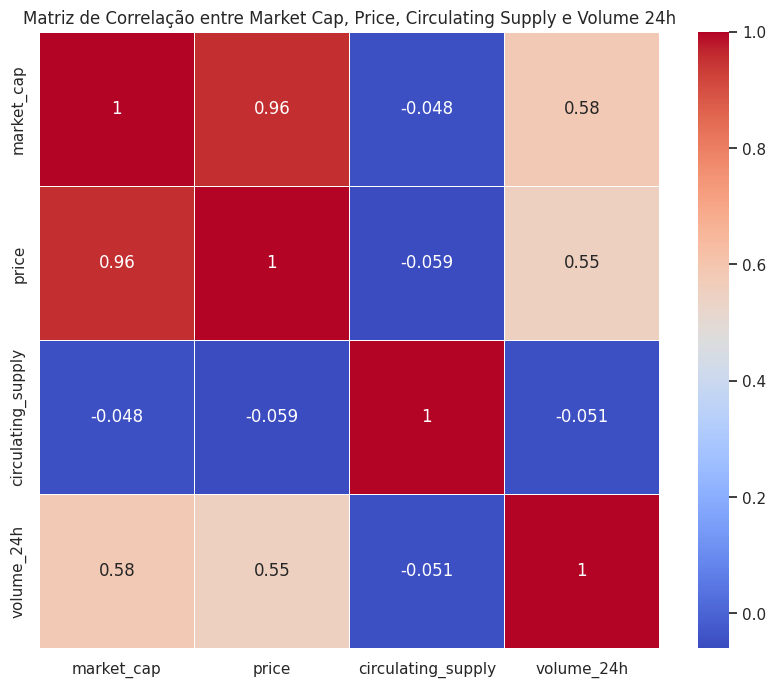

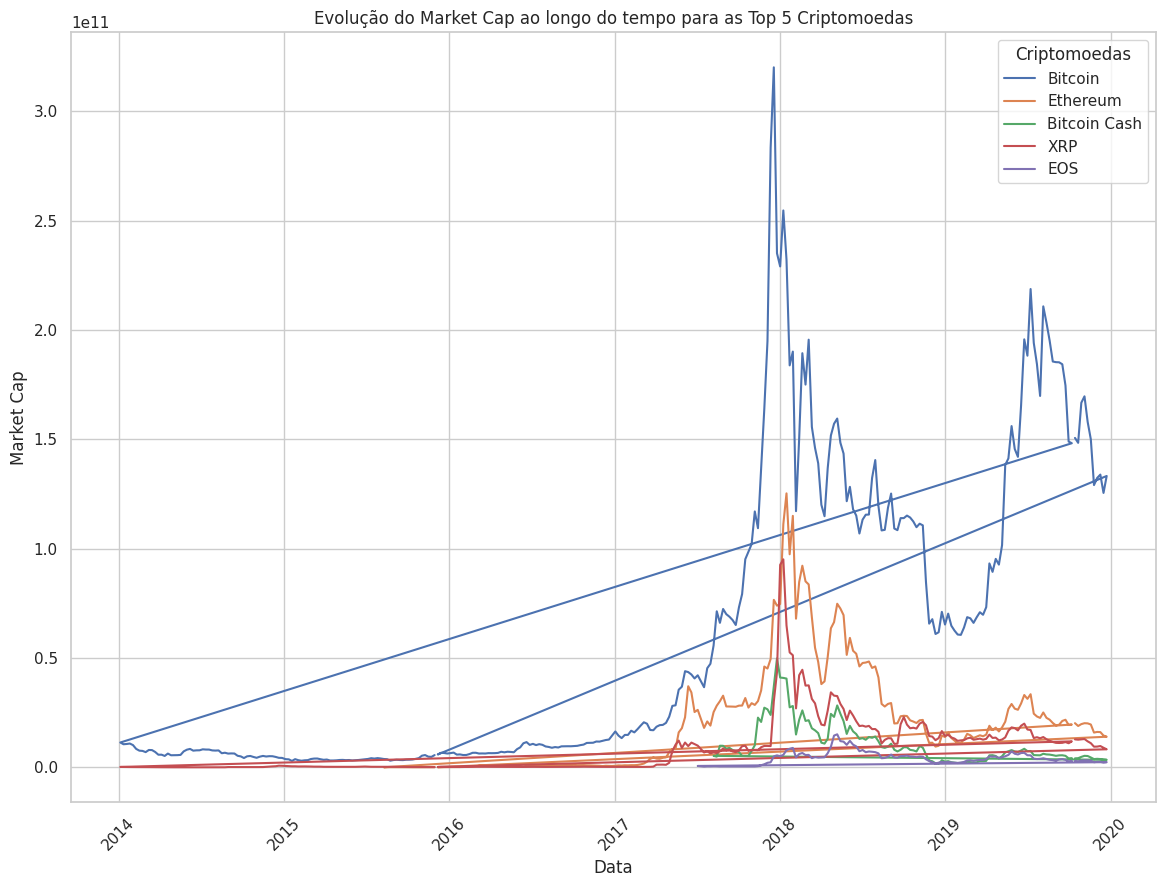

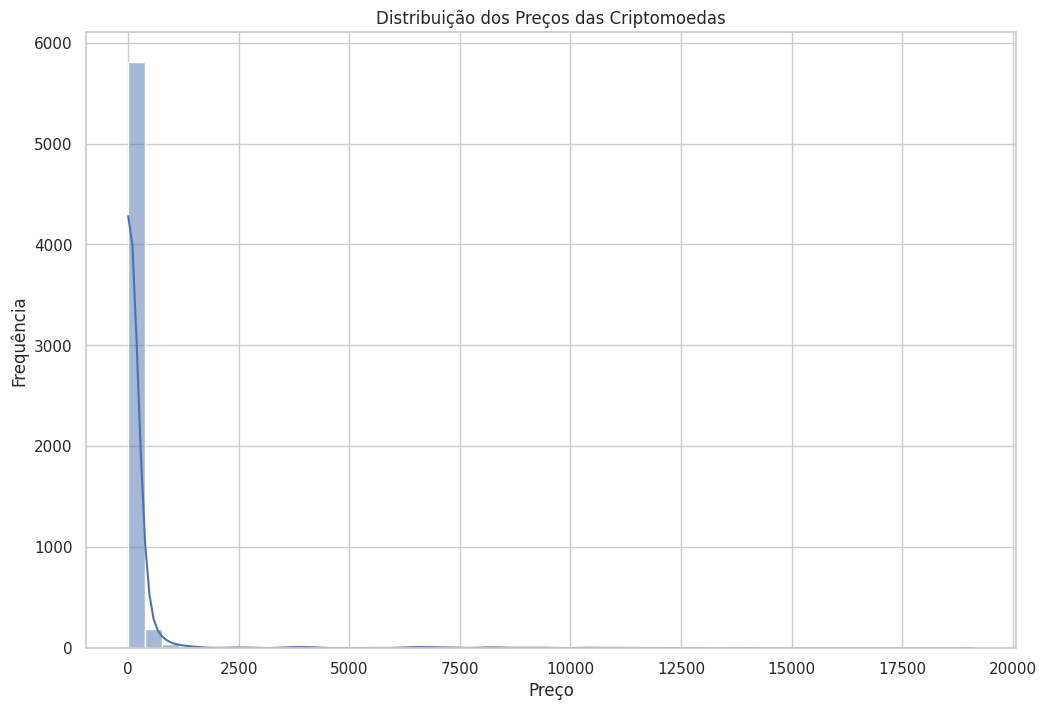

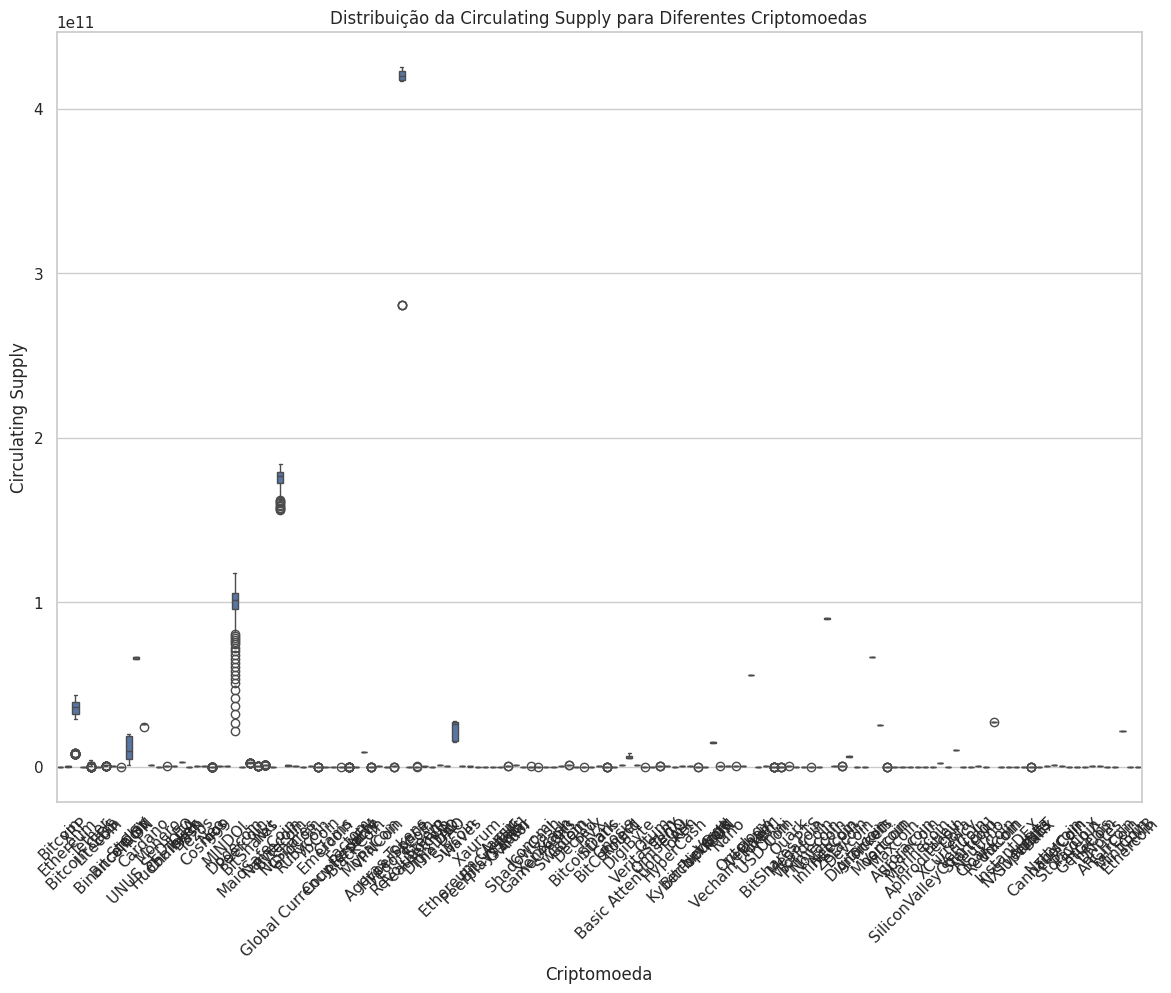

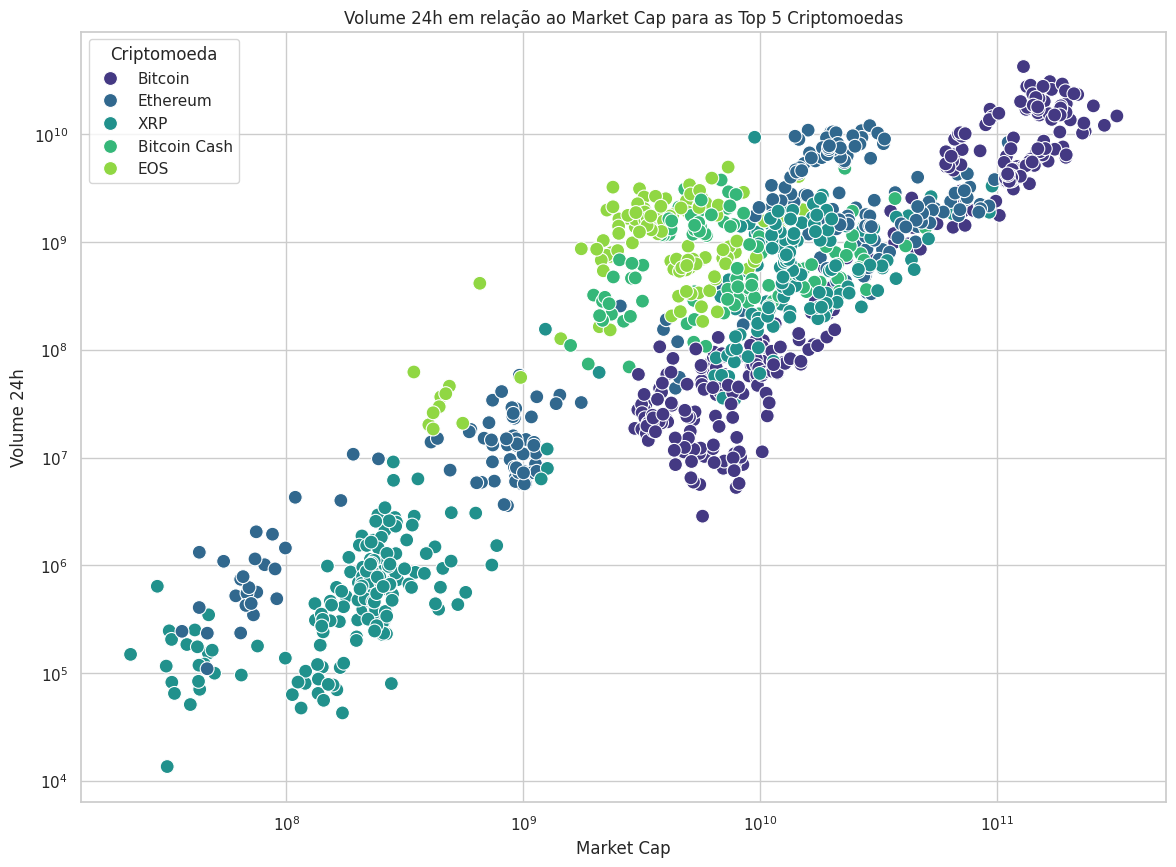

In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir o estilo dos gráficos do seaborn
sns.set(style="whitegrid")

# Análise de Dados

# 1. Correlação entre Market Cap, Price, Circulating Supply e Volume 24h

# Calcular a matriz de correlação
correlation_matrix = df_completo[['market_cap', 'price', 'circulating_supply', 'volume_24h']].corr()

# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação entre Market Cap, Price, Circulating Supply e Volume 24h')
plt.show()

# 2. Evolução do Market Cap ao longo do tempo para as principais criptomoedas

# Selecionar as top 5 criptomoedas por market cap médio
top_5_cryptos = df_completo.groupby('crypto_id')['market_cap'].mean().nlargest(5).index

# Filtrar o dataframe para incluir apenas as top 5 criptomoedas
top_5_df = df_completo[df_completo['crypto_id'].isin(top_5_cryptos)]

# Plotar a evolução do Market Cap ao longo do tempo para as top 5 criptomoedas
plt.figure(figsize=(14, 10))
for crypto in top_5_cryptos:
    crypto_df = top_5_df[top_5_df['crypto_id'] == crypto]
    plt.plot(crypto_df['date'], crypto_df['market_cap'], label=crypto)

plt.title('Evolução do Market Cap ao longo do tempo para as Top 5 Criptomoedas')
plt.xlabel('Data')
plt.ylabel('Market Cap')
plt.legend(title='Criptomoedas')
plt.xticks(rotation=45)
plt.show()

# 3. Distribuição dos preços das criptomoedas

# Plotar a distribuição dos preços
plt.figure(figsize=(12, 8))
sns.histplot(df_completo['price'], bins=50, kde=True)
plt.title('Distribuição dos Preços das Criptomoedas')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

# 4. Análise da Circulating Supply para diferentes criptomoedas

# Plotar a distribuição da Circulating Supply
plt.figure(figsize=(14, 10))
sns.boxplot(x='crypto_id', y='circulating_supply', data=df_completo)
plt.title('Distribuição da Circulating Supply para Diferentes Criptomoedas')
plt.xlabel('Criptomoeda')
plt.ylabel('Circulating Supply')
plt.xticks(rotation=45)
plt.show()

# 5. Volume 24h em relação ao Market Cap para as top 5 criptomoedas

# Filtrar o dataframe para incluir apenas as top 5 criptomoedas novamente
top_5_df = df_completo[df_completo['crypto_id'].isin(top_5_cryptos)]

# Plotar Volume 24h em relação ao Market Cap para as top 5 criptomoedas
plt.figure(figsize=(14, 10))
sns.scatterplot(x='market_cap', y='volume_24h', hue='crypto_id', data=top_5_df, palette='viridis', s=100)
plt.title('Volume 24h em relação ao Market Cap para as Top 5 Criptomoedas')
plt.xlabel('Market Cap')
plt.ylabel('Volume 24h')
plt.legend(title='Criptomoeda')
plt.xscale('log')
plt.yscale('log')
plt.show()



In [ ]:
import pandas as pd

# Suponha que 'df_completo' já contenha os dados processados conforme mencionado
# Ordenar o dataframe por crypto_id e date
df_completo = df_completo.sort_values(by=['crypto_id', 'date'])

# Calcular o ATH (All-Time High) cumulativo para cada criptomoeda
df_completo['ATH'] = df_completo.groupby('crypto_id')['market_cap'].cummax()

# Calcular o drawdown
df_completo['drawdown'] = (df_completo['ATH'] - df_completo['market_cap']) / df_completo['ATH'] * 100

In [ ]:
# Adicionar a coluna 'success' com base na porcentagem do drawdown
df_completo['success'] = df_completo['drawdown'].apply(lambda x: 1 if x > 50 else 0)

# Encontrar o maior drawdown de cada moeda
max_drawdown_per_coin = df_completo.groupby('crypto_id')['drawdown'].max()

# Exibir o maior drawdown de cada moeda
print(max_drawdown_per_coin)

# Salvar o DataFrame atualizado em um arquivo Excel
df_completo.to_excel('df_completo_atualizado.xlsx', index=False)

crypto_id
999              0.00
ARCHcoin        45.53
Agoras Tokens   29.75
Anoncoin         0.00
Aphroditecoin    0.00
                 ... 
Xaurum           0.00
Xenixcoin        0.00
YbCoin          57.63
Zcash           69.30
Zetacoin        55.89
Name: drawdown, Length: 143, dtype: float64


In [ ]:
# Assuming `df_completo` is your DataFrame
df_modified = df_completo.drop('id', axis=1)  # Drop the 'id' column
df_modified.drop('date', axis=1, inplace=True)  # Drop the 'date' column

In [ ]:
# Set 'crypto_id' as the index
df_modified.set_index('crypto_id', inplace=True)  # Modify the DataFrame in-place


In [ ]:
print(df_modified.head())  # Display the first few rows to see the index and column structure

              market_cap  price  circulating_supply  volume_24h  \
crypto_id                                                         
999       725,173,155.98   3.34      217,101,154.00  474,236.61   
999       753,192,529.53   3.47      217,101,154.00  284,680.37   
ARCHcoin    1,610,115.43   0.10       16,324,300.00   27,074.19   
ARCHcoin    2,507,876.81   0.15       16,329,667.00   46,909.71   
ARCHcoin    1,365,949.28   0.08       16,339,376.00   11,564.78   

                     ATH  drawdown  success  
crypto_id                                    
999       725,173,155.98      0.00        0  
999       753,192,529.53      0.00        0  
ARCHcoin    1,610,115.43      0.00        0  
ARCHcoin    2,507,876.81      0.00        0  
ARCHcoin    2,507,876.81     45.53        0  


In [ ]:
from sklearn.ensemble import RandomForestClassifier

df = df_modified.copy()  # Make a copy to avoid modifying the original DataFrame

# Criandr o modelo RandomForestClassifier com os parâmetros desejados
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# Dividindo os dados em conjuntos de treinamento e teste
train = df.iloc[:-100]
test = df.iloc[-100:]

# Especificando os preditores
predictors = ["market_cap", "price", "circulating_supply", "volume_24h"]

# Ajustando o modelo aos dados de treinamento
model.fit(train[predictors], train["success"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
from sklearn.metrics import precision_score

# Realizando previsões com base nos dados de teste
preds = model.predict(test[predictors])

# Criando uma série pandas com as previsões e índice correspondente
preds = pd.Series(preds, index=test.index)

# Calculo de precisão comparando as previsões com os valores reais
precision_score(test["success"], preds)

0.13636363636363635

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["success"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Previsoes")
    combined = pd.concat([test["success"], preds], axis=1)
    return combined

In [ ]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [ ]:
#Função backtest com o DataFrame, modelo e preditores
predictions = backtest(df, model, predictors)

In [ ]:
predictions["Previsoes"].value_counts()

Previsoes
0    2513
1    1207
Name: count, dtype: int64

In [ ]:
print (df["success"])

crypto_id
999         0
999         0
ARCHcoin    0
ARCHcoin    0
ARCHcoin    0
           ..
Zetacoin    0
Zetacoin    0
Zetacoin    0
Zetacoin    0
Zetacoin    0
Name: success, Length: 6220, dtype: int64


In [ ]:
precision_score(predictions["success"], predictions["Previsoes"])

0.5103562551781275

In [ ]:
predictions["success"].value_counts() / predictions.shape[0]

success
1   0.51
0   0.49
Name: count, dtype: float64

In [ ]:
from sklearn.metrics import recall_score, f1_score, roc_auc_score

# Cálculo de métricas adicionais
precision = precision_score(predictions["success"], predictions["Previsoes"])
recall = recall_score(predictions["success"], predictions["Previsoes"])
f1 = f1_score(predictions["success"], predictions["Previsoes"])
roc_auc = roc_auc_score(predictions["success"], predictions["Previsoes"])

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")


Precision: 0.5103562551781275
Recall: 0.32592592592592595
F1 Score: 0.39780432676783983
ROC AUC Score: 0.5014875531268974


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definindo o grid de parâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Inicializando o modelo
model = RandomForestClassifier(random_state=1)

# Executando o GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='precision')
grid_search.fit(train[predictors], train["success"])

# Melhor combinação de hiperparâmetros
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Reajustando o modelo com os melhores parâmetros
best_model = grid_search.best_estimator_

# Realizando o backtest com o melhor modelo
predictions = backtest(df, best_model, predictors)

# Avaliando a precisão do melhor modelo
precision_score(predictions["success"], predictions["Previsoes"])

Best parameters: {'max_depth': 10, 'min_samples_split': 200, 'n_estimators': 100}


0.5428211586901763

In [ ]:
from imblearn.over_sampling import SMOTE

# Aplicando o SMOTE para balancear as classes
smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(train[predictors], train["success"])

# Ajustando o modelo aos dados balanceados
model.fit(X_resampled, y_resampled)

# Realizando o backtest com o modelo ajustado
predictions = backtest(df, model, predictors)

# Avaliando a precisão do modelo ajustado
precision_score(predictions["success"], predictions["Previsoes"])


0.5479674796747968

In [ ]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

# Definindo o modelo XGBoost
xgb_model = xgb.XGBClassifier(random_state=1)

# Realizando a validação cruzada com 5 folds
scores = cross_val_score(xgb_model, df[predictors], df["success"], cv=5, scoring='precision')

print(f"XGBoost Precision Scores: {scores}")
print(f"Mean Precision: {scores.mean()}")

# Ajustando o modelo XGBoost aos dados completos
xgb_model.fit(df[predictors], df["success"])

# Realizando o backtest com o modelo ajustado
predictions = backtest(df, xgb_model, predictors)

# Avaliando a precisão do modelo ajustado
precision = precision_score(predictions["success"], predictions["Previsoes"])
print(f"XGBoost Precision Score (Backtest): {precision}")


XGBoost Precision Scores: [0.5730659  0.39207048 0.43560606 0.47078464 0.3878628 ]
Mean Precision: 0.451877977133715
XGBoost Precision Score (Backtest): 0.5310492505353319


In [ ]:
df['price_change'] = df['price'].pct_change()
df['volume_change'] = df['volume_24h'].pct_change()
df['market_cap_change'] = df['market_cap'].pct_change()

# Preenchendo valores NaN gerados pela mudança percentual
df = df.fillna(0)

# Novos preditores
new_predictors = ["market_cap", "price", "circulating_supply", "volume_24h", "price_change", "volume_change", "market_cap_change"]

# Ajustando o modelo com novos preditores
xgb_model.fit(df[new_predictors], df["success"])

# Realizando o backtest com novos preditores
predictions = backtest(df, xgb_model, new_predictors)

# Avaliando a precisão do modelo ajustado
precision = precision_score(predictions["success"], predictions["Previsoes"])
print(f"XGBoost Precision Score with new features (Backtest): {precision}")


XGBoost Precision Score with new features (Backtest): 0.5779310344827586
